In [32]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from kneebow.rotor import Rotor

In [33]:
df_inca_identification = pd.read_csv("./INCA-MINIPROJ/gero-inca/gero-inca-identification.csv",sep=',')
df_inca_identification

gero-code participant_id            group
0     CTR_53        sub-214  healthy control
1     CTR_36        sub-161  healthy control
2     CTR_37        sub-172  healthy control
3     CTR_28        sub-138  healthy control
4     CTR_27        sub-139  healthy control
5     CTR_30        sub-142  healthy control
6     CTR_43        sub-192  healthy control
7     CTR_46        sub-196  healthy control
8     CTR_52        sub-198  healthy control
9     CTR_57        sub-201  healthy control
10    CTR_54        sub-202  healthy control
11    CTR_20         sub-35  healthy control
12    CTR_06         sub-38  healthy control
13    CTR_19         sub-40  healthy control
14    CTR_23         sub-41  healthy control
15    CTR_25         sub-61  healthy control
16    CTR_16        sub-237  healthy control
17    CTR_24        sub-238  healthy control
18    CTR_49        sub-242  healthy control
19    CTR_51        sub-243  healthy control
20    CTR_26         sub-71  healthy control
21    CTR_17         sub-78  healthy control
22    CTR_56         sub-30  healthy control
23   SL00283        sub-513  healthy control
24   SL00284        sub-514  healthy control
25   SL00294        sub-515  healthy control
26   SL00295        sub-516  healthy control
27   SL00296        sub-517  healthy control
28   SL00304        sub-518  healthy control
29   SL00310        sub-519  healthy control
30   SL00311        sub-520  healthy control

In [34]:
df_inca_demo = pd.read_excel("./INCA-MINIPROJ/MMSE_AVD_Controles_Sanos.xlsx")
df_inca_demo = df_inca_demo.dropna()
df_inca_demo

Participante            Grupo         Origen Dato MMSE  MMSE_Language_Key  \
11       CTR_22  Control Sano T1    Primera Vista Cohorte                1.0   
16       CTR_27  Control Sano T1    Primera Vista Cohorte                1.0   
17       CTR_28  Control Sano T1    Primera Vista Cohorte                1.0   
18      CTR_30   Control Sano T1    Primera Vista Cohorte                1.0   
19       CTR_31  Control Sano T1    Primera Vista Cohorte                1.0   
20       CTR_35  Control Sano T1    Primera Vista Cohorte                1.0   
21       CTR_36  Control Sano T1    Primera Vista Cohorte                1.0   
22       CTR_37  Control Sano T2    Primera Vista Cohorte                1.0   
23       CTR_38  Control Sano T1    Primera Vista Cohorte                1.0   
24       CTR_39  Control Sano T1    Primera Vista Cohorte                1.0   
25       CTR_40  Control Sano T1    Primera Vista Cohorte                1.0   
26       CTR_41  Control Sano T1    Primera Vista Cohorte                1.0   
28       CTR_43  Control Sano T1    Primera Vista Cohorte                1.0   
29       CTR_44  Control Sano T1    Primera Vista Cohorte                1.0   
31       CTR_46  Control Sano T1  Primera Vista Cohorte 2                1.0   
34       CTR_49  Control Sano T1    Primera Vista Cohorte                1.0   
36       CTR_51  Control Sano T1    Primera Vista Cohorte                1.0   
37       CTR_52  Control Sano T1    Primera Vista Cohorte                1.0   
38       CTR_53  Control Sano T1    Primera Vista Cohorte                1.0   
39       CTR_54  Control Sano T1    Primera Vista Cohorte                1.0   
40       CTR_55  Control Sano T1    Primera Vista Cohorte                1.0   
41       CTR_56  Control Sano T1    Primera Vista Cohorte                1.0   
42       CTR_57  Control Sano T2    Primera Vista Cohorte                1.0   

    MMSE_Language_Pencil MMSE_Language_Written_Instruction  \
11                   1.0                                 1   
16                   1.0                                 1   
17                   1.0                                 1   
18                   1.0                                 1   
19                   1.0                                 1   
20                   1.0                                 1   
21                   1.0                                 1   
22                   1.0                                 1   
23                   1.0                                 1   
24                   1.0                                 1   
25                   1.0                                 1   
26                   1.0                                 1   
28                   1.0                                 1   
29                   1.0                                 1   
31                   1.0                                 1   
34                   1.0                                 1   
36                   1.0                                 1   
37                   1.0                                 -   
38                   1.0                                 1   
39                   1.0                                 1   
40                   1.0                                 1   
41                   1.0                                 1   
42                   1.0                                 1   

    MMSE_Language_Written_Sentence  MMSE_Copy_Figure  \
11                             1.0               1.0   
16                             1.0               1.0   
17                             1.0               0.0   
18                             1.0               1.0   
19                             1.0               1.0   
20                             1.0               1.0   
21                             1.0               1.0   
22                             1.0               1.0   
23                             1.0               1.0   
24                             1.

In [35]:
df_merged = df_inca_demo.merge(df_inca_identification, left_on="Participante", right_on="gero-code", how="inner")
df_merged

Participante            Grupo         Origen Dato MMSE  MMSE_Language_Key  \
0        CTR_27  Control Sano T1    Primera Vista Cohorte                1.0   
1        CTR_28  Control Sano T1    Primera Vista Cohorte                1.0   
2        CTR_36  Control Sano T1    Primera Vista Cohorte                1.0   
3        CTR_37  Control Sano T2    Primera Vista Cohorte                1.0   
4        CTR_43  Control Sano T1    Primera Vista Cohorte                1.0   
5        CTR_46  Control Sano T1  Primera Vista Cohorte 2                1.0   
6        CTR_49  Control Sano T1    Primera Vista Cohorte                1.0   
7        CTR_51  Control Sano T1    Primera Vista Cohorte                1.0   
8        CTR_52  Control Sano T1    Primera Vista Cohorte                1.0   
9        CTR_53  Control Sano T1    Primera Vista Cohorte                1.0   
10       CTR_54  Control Sano T1    Primera Vista Cohorte                1.0   
11       CTR_56  Control Sano T1    Primera Vista Cohorte                1.0   
12       CTR_57  Control Sano T2    Primera Vista Cohorte                1.0   

    MMSE_Language_Pencil MMSE_Language_Written_Instruction  \
0                    1.0                                 1   
1                    1.0                                 1   
2                    1.0                                 1   
3                    1.0                                 1   
4                    1.0                                 1   
5                    1.0                                 1   
6                    1.0                                 1   
7                    1.0                                 1   
8                    1.0                                 -   
9                    1.0                                 1   
10                   1.0                                 1   
11                   1.0                                 1   
12                   1.0                                 1   

    MMSE_Language_Written_Sentence  MMSE_Copy_Figure  \
0                              1.0               1.0   
1                              1.0               0.0   
2                              1.0               1.0   
3                              1.0               1.0   
4                              1.0               1.0   
5                              1.0               1.0   
6                              1.0               1.0   
7                              1.0               1.0   
8                              1.0               1.0   
9                              1.0               1.0   
10                             1.0               1.0   
11                             1.0               1.0   
12                             1.0               1.0   

    MMSE_Total_Temporal_Orientation  MMSE_Total_Spatial_Orientation  ...  \
0                               5.0                             5.0  ...   
1                               4.0                             5.0  ...   
2                               5.0                             5.0  ...   
3                               5.0                             5.0  ...   
4                               5.0                             5.0  ...   
5                               5.0                             5.0  ...   
6                               5.0                             5.0  ...   
7                               5.0                             5.0  ...   
8                               5.0                             5.0  ...   
9                               5.0                             5.0  ...   
10                              5.0                             5.0  ...   
11                              5.0                             5.0  ...   
12                              5.0                             5.0  ...   

    MMSE_Language_Phrase  MMSE_Language_Verbal_Instruction  \
0                    1.0                               3.0   
1                    1.0               

In [36]:
df_adni_full = pd.read_csv("./ADNI/data_ADNI.csv",sep=',')
df_adni_full

Unnamed: 0   RID GROUP_BL   AGE PTGENDER  PTEDUCAT         PTETHCAT  \
0             0     2       CN  74.3     Male        16  Not Hisp/Latino   
1             1     3       AD  81.3     Male        18  Not Hisp/Latino   
2             2     4     LMCI  67.5     Male        10      Hisp/Latino   
3             3     5       CN  73.7     Male        16  Not Hisp/Latino   
4             4     6     LMCI  80.4   Female        13  Not Hisp/Latino   
..          ...   ...      ...   ...      ...       ...              ...   
814         814  1425     LMCI  75.6   Female        16  Not Hisp/Latino   
815         815  1426     LMCI  83.4     Male        18  Not Hisp/Latino   
816         816  1427     LMCI  69.6   Female        12  Not Hisp/Latino   
817         817  1430       AD  83.4   Female        12  Not Hisp/Latino   
818         818  1435       AD  82.4     Male        12  Not Hisp/Latino   

    PTRACCAT  MMSCORE      FLDSTRENG  ... rh_lingual_thickness_SD  \
0      White       28  1.5 Tesla MRI  ...                   0.694   
1      White       20  1.5 Tesla MRI  ...                   0.591   
2      White       27  1.5 Tesla MRI  ...                   0.588   
3      White       29  1.5 Tesla MRI  ...                   0.628   
4      White       25  1.5 Tesla MRI  ...                   0.631   
..       ...      ...            ...  ...                     ...   
814    White       28  1.5 Tesla MRI  ...                   0.662   
815    White       26  1.5 Tesla MRI  ...                   0.511   
816    White       27  1.5 Tesla MRI  ...                   0.778   
817    White       21  1.5 Tesla MRI  ...                   0.661   
818    White       21  1.5 Tesla MRI  ...                   0.633   

    rh_medialorbitofrontal_volume rh_medialorbitofrontal_surface  \
0                            3835                           1622   
1                            3681                           1734   
2                            4060                           1728   
3                            5180                           1868   
4                            3078                           1241   
..                            ...                            ...   
814                          3634                           1457   
815                          4025                           1703   
816                          4639                           1729   
817                          3430                           1213   
818                          4384                           1416   

    rh_medialorbitofrontal_thickness_mean rh_medialorbitofrontal_thickness_SD  \
0                                   2.077                               0.746   
1                                   1.942                               0.696   
2                                   2.180                               0.607   
3                                   2.543                               0.709   
4                                   2.141                               0.701   
..                                    ...                                 ...   
814                                 2.286                               0.715   
815                                 2.199                               0.856   
816                                 2.546                               0.728   
817                                 2.737                               1.089   
818                                 2.661                               0.992   

    rh_middletemporal_volume rh_middletemporal_surface  \
0                      15683                      4272   
1                      10387                      3316   
2                      11156                      3598   
3                      11579                      3387   
4                       9641                      2781   
..                       ...                       ...   
814                    11010                      2886   
815      

In [37]:
df_adni_full = df_adni_full[df_adni_full['GROUP_BL'] == 'CN']
df_adni_full

Unnamed: 0   RID GROUP_BL   AGE PTGENDER  PTEDUCAT         PTETHCAT  \
0             0     2       CN  74.3     Male        16  Not Hisp/Latino   
3             3     5       CN  73.7     Male        16  Not Hisp/Latino   
6             6     8       CN  84.5   Female        18  Not Hisp/Latino   
8             8    14       CN  78.5   Female        12      Hisp/Latino   
9             9    15       CN  80.8     Male        18  Not Hisp/Latino   
..          ...   ...      ...   ...      ...       ...              ...   
735         735  1280       CN  70.7   Female        14      Hisp/Latino   
741         741  1286       CN  75.5   Female        19  Not Hisp/Latino   
742         742  1288       CN  59.9     Male        20  Not Hisp/Latino   
752         752  1301       CN  72.1   Female        18  Not Hisp/Latino   
754         754  1306       CN  74.5   Female        14  Not Hisp/Latino   

    PTRACCAT  MMSCORE      FLDSTRENG  ... rh_lingual_thickness_SD  \
0      White       28  1.5 Tesla MRI  ...                   0.694   
3      White       29  1.5 Tesla MRI  ...                   0.628   
6      White       28  1.5 Tesla MRI  ...                   0.541   
8      White       29  1.5 Tesla MRI  ...                   0.613   
9      White       29  1.5 Tesla MRI  ...                   0.578   
..       ...      ...            ...  ...                     ...   
735    White       30  1.5 Tesla MRI  ...                   0.507   
741    White       30  1.5 Tesla MRI  ...                   0.504   
742    White       30  1.5 Tesla MRI  ...                   0.663   
752    White       30  1.5 Tesla MRI  ...                   0.538   
754    White       29  1.5 Tesla MRI  ...                   0.772   

    rh_medialorbitofrontal_volume rh_medialorbitofrontal_surface  \
0                            3835                           1622   
3                            5180                           1868   
6                            3435                           1412   
8                            3034                           1295   
9                            3982                           1608   
..                            ...                            ...   
735                          3812                           1482   
741                          4744                           2183   
742                          3903                           1567   
752                          4696                           1987   
754                          2923                           1288   

    rh_medialorbitofrontal_thickness_mean rh_medialorbitofrontal_thickness_SD  \
0                                   2.077                               0.746   
3                                   2.543                               0.709   
6                                   2.274                               0.676   
8                                   2.145                               0.820   
9                                   2.148                               0.767   
..                                    ...                                 ...   
735                                 2.364                               0.699   
741                                 1.964                               0.704   
742                                 2.186                               0.718   
752                                 2.267                               0.542   
754                                 2.086                               0.801   

    rh_middletemporal_volume rh_middletemporal_surface  \
0                      15683                      4272   
3                      11579                      3387   
6                      10469                      3533   
8                      10493                      3046   
9                       9993                      3367   
..                       ...                       ...   
735                     9128                      2728   
741      

In [38]:
df_adni = pd.read_csv("./df_adni_gm_volumen.csv",sep=';')
col = df_adni_full["PTEDUCAT"].values
col2 = df_adni_full["MMSCORE"].values
df_adni["PTEDUCAT"] = col
df_adni["MMSCORE"] = col2
df_adni

Unnamed: 0   RID PTGENDER   AGE  brainstem_volume  left_vessel_volume  \
0             0     2     Male  74.3            23.003               0.063   
1             3     5     Male  73.7            22.015               0.122   
2             6     8   Female  84.5            19.434               0.102   
3             8    14   Female  78.5            15.665               0.027   
4             9    15     Male  80.8            23.706               0.151   
..          ...   ...      ...   ...               ...                 ...   
224         735  1280   Female  70.7            20.573               0.027   
225         741  1286   Female  75.5            20.872               0.073   
226         742  1288     Male  59.9            24.679               0.097   
227         752  1301   Female  72.1            24.993               0.073   
228         754  1306   Female  74.5            17.734               0.119   

     left_caudate_volume  left_putamen_volume  opticchiasm_volume  \
0                  4.395                4.892               0.308   
1                  3.090                4.778               0.308   
2                  2.527                3.976               0.331   
3                  3.528                4.189               0.328   
4                  2.923                4.351               0.307   
..                   ...                  ...                 ...   
224                3.607                5.399               0.223   
225                4.653                5.373               0.375   
226                3.639                6.264               0.379   
227                3.000                4.965               0.211   
228                3.167                4.374               0.219   

     right_vessel_volume  ...  rh_posteriorcingulate_volume  \
0                  0.077  ...                         3.809   
1                  0.070  ...                         3.910   
2                  0.067  ...                         3.176   
3                  0.038  ...                         2.889   
4                  0.100  ...                         2.693   
..                   ...  ...                           ...   
224                0.041  ...                         2.998   
225                0.067  ...                         3.082   
226                0.049  ...                         3.155   
227                0.053  ...                         3.043   
228                0.101  ...                         2.575   

     rh_transversetemporal_volume  rh_caudalmiddlefrontal_volume  \
0                           0.553                          6.566   
1                           1.022                          5.626   
2                           0.568                          3.546   
3                           0.683                          4.457   
4                           0.512                          3.937   
..                            ...                            ...   
224                         0.793                          3.844   
225                         0.883                          6.041   
226                         0.823                          7.391   
227                         0.615                          5.034   
228                         0.630                          4.605   

     rh_medialorbitofrontal_volume  rh_lateralorbitofrontal_volume  \
0                            3.835                           6.795   
1                            5.180                           7.397   
2                            3.435                           6.036   
3                            3.034                           5.795   
4                            3.982                           5.292   
..                             ...                             ...   
224                          3.812                           5.897   
225                          4.744                           5.509   
226                          3.903 

In [39]:
df_inca = pd.read_csv("./df_inca_gm_volumen.csv",sep=';')
df_inca

Unnamed: 0 participant_id gender        age  brain-stem  left-vessel  \
0            0        sub-214      f  74.364384     17.4850       0.0175   
1            1        sub-161      f  78.394521     16.8912       0.0032   
2            2        sub-172      f  77.320548     15.7690       0.0064   
3            3        sub-138      m  73.520548     22.1628       0.0239   
4            4        sub-139      m  76.424658     17.3174       0.0042   
5            5        sub-142      f  72.142466     16.3012       0.0176   
6            6        sub-192      f  91.479452     17.7342       0.0600   
7            7        sub-196      f  77.093151     20.4006       0.0139   
8            8        sub-198      f  75.331507     19.7109       0.0261   
9            9        sub-201      f  73.991781     19.5976       0.1781   
10          10        sub-202      f  77.923288     15.9974       0.0936   
11          11         sub-35      m  74.295890     21.3132       0.0459   
12          12         sub-38      m  79.638356     21.3375       0.0366   
13          13         sub-40      f  70.128767     23.7640       0.0281   
14          14         sub-41      f  80.254795     18.9305       0.0271   
15          15         sub-61      f  81.032877     20.2091       0.0553   
16          16        sub-237      f  72.586301     16.8357       0.0385   
17          17        sub-238      m  72.057534     21.3815       0.0190   
18          18        sub-241      f  76.142466     24.4480       0.0757   
19          19        sub-242      m  80.169863     23.0100       0.0365   
20          20        sub-243      f  74.441096     18.9961       0.0315   
21          21         sub-71      f  73.079452     20.1453       0.0794   
22          22         sub-78      m  75.893151     20.5727       0.1034   
23          23        sub-513      f  60.753425     18.8306       0.0271   
24          24        sub-514      f  77.271233     19.0509       0.0146   
25          25        sub-515      f  69.463014     23.4582       0.0124   
26          26        sub-516      f  66.912329     19.9067       0.0360   
27          27        sub-517      f  60.991781     18.1277       0.0463   
28          28        sub-518      m  80.704110     22.0295       0.0429   
29          29        sub-519      f  65.967123     20.1154       0.0449   
30          30        sub-520      f  54.610959     27.0367       0.0195   

    left-caudate  left-putamen  optic-chiasm  right-vessel  ...  \
0         3.4699        4.4771        0.1348        0.0041  ...   
1         3.3686        4.8374        0.1614        0.0000  ...   
2         2.7845        3.6798        0.1129        0.0133  ...   
3         3.0680        4.7896        0.2166        0.0161  ...   
4         2.9996        3.7887        0.1696        0.0161  ...   
5         2.8895        3.8551        0.0904        0.0070  ...   
6         2.6106        4.0005        0.2235        0.0116  ...   
7         2.9633        4.4863        0.1896        0.0386  ...   
8         2.5264        4.0270        0.1505        0.0162  ...   
9         3.5735        4.5291        0.2393        0.0109  ...   
10        2.9457        4.4270        0.2525        0.0246  ...   
11        3.9581        4.5473        0.2829        0.0210  ...   
12        3.3072        5.0225        0.2177        0.0120  ...   
13        3.7134        5.2970        0.1918        0.1752  ...   
14        2.7593        3.4234        0.2021        0.0121  ...   
15        3.6450        4.9514        0.2243        0.0146  ...   
16        2.3952        4.1465        0.1095        0.0578  ...   
17        3.0378        4.3382        0.1860        0.0045  ...   
18        3.2472        4.1231        0.2388        0.0144  ...   
19        3.0602        3.7570        0.1697        0.0559  ...   
20        2.6957        3.9301        0.1662        0.0213  ...   
21        2.7335        4.4021        0.1711        0.0000  ...   
22        3.3720        4.0565

In [40]:
df_inca_psico = df_inca.merge(df_merged, left_on="participant_id", right_on="participant_id", how="inner")
df_inca_psico

Unnamed: 0 participant_id gender        age  brain-stem  left-vessel  \
0            0        sub-214      f  74.364384     17.4850       0.0175   
1            1        sub-161      f  78.394521     16.8912       0.0032   
2            2        sub-172      f  77.320548     15.7690       0.0064   
3            3        sub-138      m  73.520548     22.1628       0.0239   
4            4        sub-139      m  76.424658     17.3174       0.0042   
5            6        sub-192      f  91.479452     17.7342       0.0600   
6            7        sub-196      f  77.093151     20.4006       0.0139   
7            8        sub-198      f  75.331507     19.7109       0.0261   
8            9        sub-201      f  73.991781     19.5976       0.1781   
9           10        sub-202      f  77.923288     15.9974       0.0936   
10          19        sub-242      m  80.169863     23.0100       0.0365   
11          20        sub-243      f  74.441096     18.9961       0.0315   

    left-caudate  left-putamen  optic-chiasm  right-vessel  ...  \
0         3.4699        4.4771        0.1348        0.0041  ...   
1         3.3686        4.8374        0.1614        0.0000  ...   
2         2.7845        3.6798        0.1129        0.0133  ...   
3         3.0680        4.7896        0.2166        0.0161  ...   
4         2.9996        3.7887        0.1696        0.0161  ...   
5         2.6106        4.0005        0.2235        0.0116  ...   
6         2.9633        4.4863        0.1896        0.0386  ...   
7         2.5264        4.0270        0.1505        0.0162  ...   
8         3.5735        4.5291        0.2393        0.0109  ...   
9         2.9457        4.4270        0.2525        0.0246  ...   
10        3.0602        3.7570        0.1697        0.0559  ...   
11        2.6957        3.9301        0.1662        0.0213  ...   

    MMSE_Total_Memory  MMSE_Language_Phrase  MMSE_Language_Verbal_Instruction  \
0                 3.0                   1.0                               3.0   
1                 2.0                   1.0                               3.0   
2                 3.0                   1.0                               3.0   
3                 1.0                   1.0                               3.0   
4                 3.0                   1.0                               3.0   
5                 3.0                   1.0                               3.0   
6                 3.0                   1.0                               3.0   
7                 2.0                   1.0                               3.0   
8                 3.0                   1.0                               3.0   
9                 3.0                   1.0                               3.0   
10                3.0                   1.0                               2.0   
11                2.0                   1.0                               3.0   

    MiniMental_Total_Score  AVD BASICAS  AVD INSTRUMENTAL  AVD AVANZADAS  \
0                     30.0          0.0               0.0            0.0   
1                     28.0          0.0               0.0            0.0   
2                     30.0          0.0               8.0           20.0   
3                     26.0          0.0               2.0            7.0   
4                     27.0          0.0              17.0           29.0   
5                     30.0         13.0              37.0           42.0   
6                     30.0          0.0               5.0            0.0   
7                     28.0          7.0               2.0            0.0   
8                     30.0          0.0               5.0            5.0   
9                     30.0          0.0               0.0            0.0   
10                    29.0          0.0               2.0            0.0   
11                    29.0          0.0              10.0           13.0   

     AVD TOTAL  gero-code            group  
0          0.0     CTR_53  healthy control  
1         

In [41]:
df_inca["age"] = df_inca["age"].apply(lambda x: round(x))
df_inca

Unnamed: 0 participant_id gender  age  brain-stem  left-vessel  \
0            0        sub-214      f   74     17.4850       0.0175   
1            1        sub-161      f   78     16.8912       0.0032   
2            2        sub-172      f   77     15.7690       0.0064   
3            3        sub-138      m   74     22.1628       0.0239   
4            4        sub-139      m   76     17.3174       0.0042   
5            5        sub-142      f   72     16.3012       0.0176   
6            6        sub-192      f   91     17.7342       0.0600   
7            7        sub-196      f   77     20.4006       0.0139   
8            8        sub-198      f   75     19.7109       0.0261   
9            9        sub-201      f   74     19.5976       0.1781   
10          10        sub-202      f   78     15.9974       0.0936   
11          11         sub-35      m   74     21.3132       0.0459   
12          12         sub-38      m   80     21.3375       0.0366   
13          13         sub-40      f   70     23.7640       0.0281   
14          14         sub-41      f   80     18.9305       0.0271   
15          15         sub-61      f   81     20.2091       0.0553   
16          16        sub-237      f   73     16.8357       0.0385   
17          17        sub-238      m   72     21.3815       0.0190   
18          18        sub-241      f   76     24.4480       0.0757   
19          19        sub-242      m   80     23.0100       0.0365   
20          20        sub-243      f   74     18.9961       0.0315   
21          21         sub-71      f   73     20.1453       0.0794   
22          22         sub-78      m   76     20.5727       0.1034   
23          23        sub-513      f   61     18.8306       0.0271   
24          24        sub-514      f   77     19.0509       0.0146   
25          25        sub-515      f   69     23.4582       0.0124   
26          26        sub-516      f   67     19.9067       0.0360   
27          27        sub-517      f   61     18.1277       0.0463   
28          28        sub-518      m   81     22.0295       0.0429   
29          29        sub-519      f   66     20.1154       0.0449   
30          30        sub-520      f   55     27.0367       0.0195   

    left-caudate  left-putamen  optic-chiasm  right-vessel  ...  \
0         3.4699        4.4771        0.1348        0.0041  ...   
1         3.3686        4.8374        0.1614        0.0000  ...   
2         2.7845        3.6798        0.1129        0.0133  ...   
3         3.0680        4.7896        0.2166        0.0161  ...   
4         2.9996        3.7887        0.1696        0.0161  ...   
5         2.8895        3.8551        0.0904        0.0070  ...   
6         2.6106        4.0005        0.2235        0.0116  ...   
7         2.9633        4.4863        0.1896        0.0386  ...   
8         2.5264        4.0270        0.1505        0.0162  ...   
9         3.5735        4.5291        0.2393        0.0109  ...   
10        2.9457        4.4270        0.2525        0.0246  ...   
11        3.9581        4.5473        0.2829        0.0210  ...   
12        3.3072        5.0225        0.2177        0.0120  ...   
13        3.7134        5.2970        0.1918        0.1752  ...   
14        2.7593        3.4234        0.2021        0.0121  ...   
15        3.6450        4.9514        0.2243        0.0146  ...   
16        2.3952        4.1465        0.1095        0.0578  ...   
17        3.0378        4.3382        0.1860        0.0045  ...   
18        3.2472        4.1231        0.2388        0.0144  ...   
19        3.0602        3.7570        0.1697        0.0559  ...   
20        2.6957        3.9301        0.1662        0.0213  ...   
21        2.7335        4.4021        0.1711        0.0000  ...   
22        3.3720        4.0565        0.2407        0.0098  ...   
23        2.9552        3.7571        0.1330        0.0579  ...   
24        4.3852        5.0558        0.2458        0.0401  ...   
25        3.0872     

In [42]:
def_inca_assessment = pd.read_csv("./INCA-MINIPROJ/assessments/assessments-hc.csv",sep=',')
def_inca_assessment

participant_id  MoCA  FCSRT-RL  FCSRT-RT  FCSRT-RC        age  Escolaridad  \
0          sub-38    27        34        48        14  79.638356           12   
1         sub-237    23        32        48        16  72.586301           12   
2          sub-78    25        32        48        16  75.893151           10   
3          sub-40    29        32        48        15  70.128767           16   
4          sub-35    22        30        48        18  74.295890           23   
5          sub-41    24        33        48        15  80.254795           10   
6         sub-238    22        35        46        10  72.057534           17   
7          sub-61    24        34        48        14  81.032877           15   
8          sub-71    23        46        48         1  73.079452           11   
9         sub-139    24        29        48        19  76.424658            3   
10        sub-138    23        24        47        23  73.520548           13   
11        sub-142    22        34        48        14  72.142466            8   
12        sub-150    25        37        47         9  73.000000            8   
13        sub-161    27        33        48        15  78.394521           17   
14        sub-172    27        38        48         9  77.320548           17   
15        sub-241    23        38        48         9  76.142466            6   
16        sub-192    27        31        48        17  91.479452           12   
17        sub-196    29        34        48        14  77.093151           22   
18        sub-242    30        40        48         7  80.169863           17   
19        sub-243    27        37        48        10  74.441096           12   
20        sub-198    25        36        48        12  75.331507           17   
21        sub-214    27        36        48        12  74.364384           15   
22        sub-202    25        28        48        20  77.923288           12   
23         sub-30    29        38        48         9  79.501370           19   
24        sub-201    27        37        48        10  73.991781           17   

              group  
0   healthy control  
1   healthy control  
2   healthy control  
3   healthy control  
4   healthy control  
5   healthy control  
6   healthy control  
7   healthy control  
8   healthy control  
9   healthy control  
10  healthy control  
11  healthy control  
12  healthy control  
13  healthy control  
14  healthy control  
15  healthy control  
16  healthy control  
17  healthy control  
18  healthy control  
19  healthy control  
20  healthy control  
21  healthy control  
22  healthy control  
23  healthy control  
24  healthy control

In [43]:
df_inca_esco = df_inca.merge(def_inca_assessment, left_on="participant_id", right_on="participant_id", how="inner")
df_inca_esco

Unnamed: 0 participant_id gender  age_x  brain-stem  left-vessel  \
0            0        sub-214      f     74     17.4850       0.0175   
1            1        sub-161      f     78     16.8912       0.0032   
2            2        sub-172      f     77     15.7690       0.0064   
3            3        sub-138      m     74     22.1628       0.0239   
4            4        sub-139      m     76     17.3174       0.0042   
5            5        sub-142      f     72     16.3012       0.0176   
6            6        sub-192      f     91     17.7342       0.0600   
7            7        sub-196      f     77     20.4006       0.0139   
8            8        sub-198      f     75     19.7109       0.0261   
9            9        sub-201      f     74     19.5976       0.1781   
10          10        sub-202      f     78     15.9974       0.0936   
11          11         sub-35      m     74     21.3132       0.0459   
12          12         sub-38      m     80     21.3375       0.0366   
13          13         sub-40      f     70     23.7640       0.0281   
14          14         sub-41      f     80     18.9305       0.0271   
15          15         sub-61      f     81     20.2091       0.0553   
16          16        sub-237      f     73     16.8357       0.0385   
17          17        sub-238      m     72     21.3815       0.0190   
18          18        sub-241      f     76     24.4480       0.0757   
19          19        sub-242      m     80     23.0100       0.0365   
20          20        sub-243      f     74     18.9961       0.0315   
21          21         sub-71      f     73     20.1453       0.0794   
22          22         sub-78      m     76     20.5727       0.1034   

    left-caudate  left-putamen  optic-chiasm  right-vessel  ...  \
0         3.4699        4.4771        0.1348        0.0041  ...   
1         3.3686        4.8374        0.1614        0.0000  ...   
2         2.7845        3.6798        0.1129        0.0133  ...   
3         3.0680        4.7896        0.2166        0.0161  ...   
4         2.9996        3.7887        0.1696        0.0161  ...   
5         2.8895        3.8551        0.0904        0.0070  ...   
6         2.6106        4.0005        0.2235        0.0116  ...   
7         2.9633        4.4863        0.1896        0.0386  ...   
8         2.5264        4.0270        0.1505        0.0162  ...   
9         3.5735        4.5291        0.2393        0.0109  ...   
10        2.9457        4.4270        0.2525        0.0246  ...   
11        3.9581        4.5473        0.2829        0.0210  ...   
12        3.3072        5.0225        0.2177        0.0120  ...   
13        3.7134        5.2970        0.1918        0.1752  ...   
14        2.7593        3.4234        0.2021        0.0121  ...   
15        3.6450        4.9514        0.2243        0.0146  ...   
16        2.3952        4.1465        0.1095        0.0578  ...   
17        3.0378        4.3382        0.1860        0.0045  ...   
18        3.2472        4.1231        0.2388        0.0144  ...   
19        3.0602        3.7570        0.1697        0.0559  ...   
20        2.6957        3.9301        0.1662        0.0213  ...   
21        2.7335        4.4021        0.1711        0.0000  ...   
22        3.3720        4.0565        0.2407        0.0098  ...   

    rh_rostralmiddlefrontal  rh_caudalanteriorcingulate  \
0                    12.485                       1.721   
1                    10.610                       2.139   
2                     9.595                       1.817   
3                    13.859                       1.692   
4                    12.435                       1.812   
5                    12.078                       1.205   
6                    12.816                       1.104   
7                    13.688                       1.247   
8                    11.092                       1.120   
9                    12.608                       0.602   
10               

In [44]:
df_adni.columns.values

array(['Unnamed: 0', 'RID', 'PTGENDER', 'AGE', 'brainstem_volume',
       'left_vessel_volume', 'left_caudate_volume', 'left_putamen_volume',
       'opticchiasm_volume', 'right_vessel_volume',
       'left_amygdala_volume', 'left_pallidum_volume',
       'left_thalamus_volume', 'right_caudate_volume',
       'right_putamen_volume', 'right_amygdala_volume',
       'right_pallidum_volume', 'right_thalamus_volume',
       'left_hippocampus_volume', 'right_hippocampus_volume',
       'right_inferiorlateralventricle_volume',
       'nonwmhypointensities_volume', 'left_choroidplexus_volume',
       'right_choroidplexus_volume', 'left_cerebellumcortex_volume',
       'left_anteriorlateralventricle', 'left_lateralventricle_volume',
       'nonwmhypointensities_volume.1', 'right_cerebellumcortex_volume',
       'right_inferiorlateralventricle_volume.1',
       'right_lateralventricle_volume', 'eTIV', 'lh_cuneus_volume',
       'lh_insula_volume', 'lh_lingual_volume', 'lh_bankssts_volume',
    

In [45]:
df_inca_esco.columns.values

array(['Unnamed: 0', 'participant_id', 'gender', 'age_x', 'brain-stem',
       'left-vessel', 'left-caudate', 'left-putamen', 'optic-chiasm',
       'right-vessel', 'left-amygdala', 'left-pallidum', 'left-thalamus',
       'right-caudate', 'right-putamen', 'right-amygdala',
       'right-pallidum', 'right-thalamus', 'left-hippocampus',
       'right-hippocampus', 'right-inf-lat-vent', 'wm-hypointensities',
       'left-choroid-plexus', 'right-choroid-plexus',
       'left-cerebellum-cortex', 'left-lateral-ventricle',
       'left-lateral-ventricle.1', 'non-wm-hypointensities',
       'right-cerebellum-cortex', 'right-lateral-ventricle',
       'right-lateral-ventricle.1', 'etiv', 'lh_cuneus', 'lh_insula',
       'lh_lingual', 'lh_bankssts', 'lh_fusiform', 'lh_precuneus',
       'lh_entorhinal', 'lh_precentral', 'lh_frontalpole',
       'lh_paracentral', 'lh_postcentral', 'lh_temporalpole',
       'lh_parsorbitalis', 'lh_pericalcarine', 'lh_supramarginal',
       'lh_middletemporal', 'l

In [46]:
df_inca_esco.columns[4:100].values
df_inca_esco.columns[100:].values

array(['MoCA', 'FCSRT-RL', 'FCSRT-RT', 'FCSRT-RC', 'age_y', 'Escolaridad',
       'group'], dtype=object)

In [47]:
print(len(df_inca_esco.columns[4:100]))

96


In [48]:
#Calculamos La distancia k para determinar nuestro valor de eps.
def calculate_kn_distance(X, neigh=2):
    neigh = NearestNeighbors(n_neighbors=neigh)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    return distances[:,1:].reshape(-1)  

#Obtenemos el valor exacto de eps utilizando kneebow, esta función nos permite
#encontrar el codo de una curva rotando La curva y tomando el valor mínimo.
def get_eps(X, neigh=2):
    eps_dist = np.sort(calculate_kn_distance(X, neigh=neigh))
    rotor = Rotor()
    curve_xy = np.concatenate([np.arange(eps_dist.shape[0]).reshape(-1, 1), eps_dist.reshape(-1, 1)],1)
    rotor.fit_rotate(curve_xy)
    #rotor.plot_elbow()
    e_idx = rotor.get_elbow_index()
    return curve_xy[e_idx]

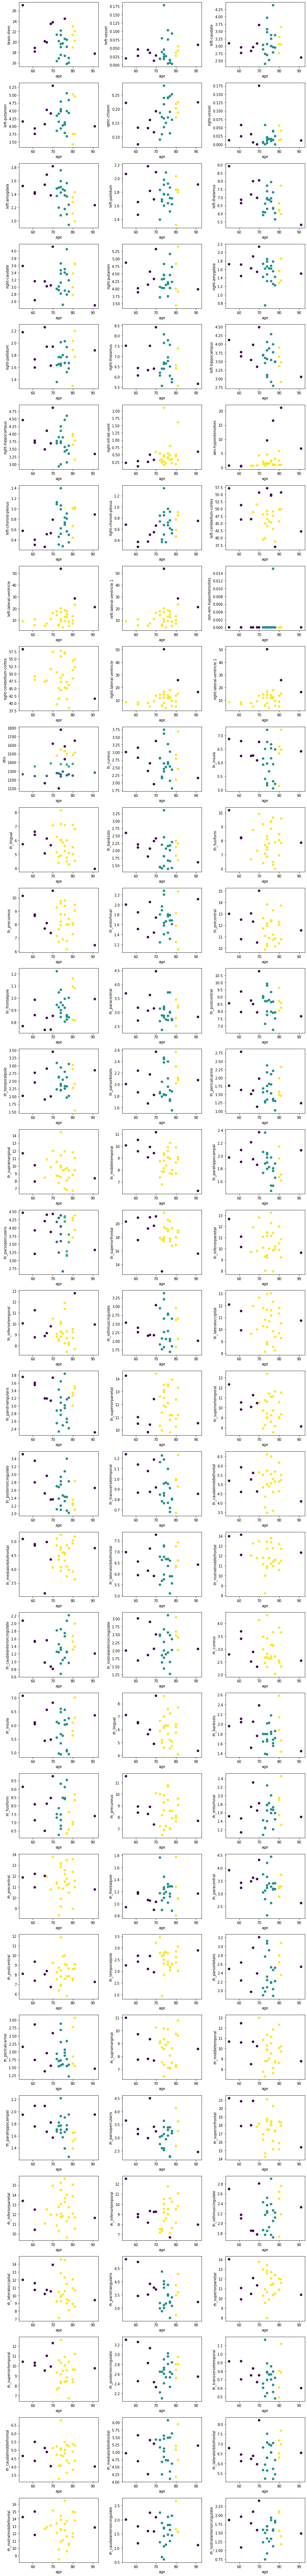

In [49]:
def plotalot(df,col,colnames,numrow,numcol):
    fig1, axes1 = plt.subplots(numrow, numcol, figsize=(12, 100))
    
    index = 0
    for i in range(0,len(colnames)):
        
        new_df = pd.DataFrame({'vol':df[colnames[i]], 'vol2': df[col]})
        idx, epsilon = get_eps(new_df,4)
        
        dbscan = DBSCAN(eps=epsilon, metric = "euclidean").fit(new_df)
        clusters = dbscan.fit_predict(new_df)
        
        df_values = new_df.values

        ax = axes1.flatten()[index]
        ax.scatter(df_values[:, 1], df_values[:, 0], c=clusters)
        #ax.set_title("ASD") 
        ax.set_xlabel(col)
        ax.set_ylabel(colnames[i])
        #ax.set_ylim(-0.1, 1.1) 

        index += 1
        
    plt.tight_layout()
    plt.show()
    
plotalot(df_inca,"age",df_inca.columns[4:100],32,3) 

In [50]:
print(len(df_adni.columns[4:100]))
df_adni.columns[4:100].values

96


array(['brainstem_volume', 'left_vessel_volume', 'left_caudate_volume',
       'left_putamen_volume', 'opticchiasm_volume', 'right_vessel_volume',
       'left_amygdala_volume', 'left_pallidum_volume',
       'left_thalamus_volume', 'right_caudate_volume',
       'right_putamen_volume', 'right_amygdala_volume',
       'right_pallidum_volume', 'right_thalamus_volume',
       'left_hippocampus_volume', 'right_hippocampus_volume',
       'right_inferiorlateralventricle_volume',
       'nonwmhypointensities_volume', 'left_choroidplexus_volume',
       'right_choroidplexus_volume', 'left_cerebellumcortex_volume',
       'left_anteriorlateralventricle', 'left_lateralventricle_volume',
       'nonwmhypointensities_volume.1', 'right_cerebellumcortex_volume',
       'right_inferiorlateralventricle_volume.1',
       'right_lateralventricle_volume', 'eTIV', 'lh_cuneus_volume',
       'lh_insula_volume', 'lh_lingual_volume', 'lh_bankssts_volume',
       'lh_fusiform_volume', 'lh_precuneus_volume',

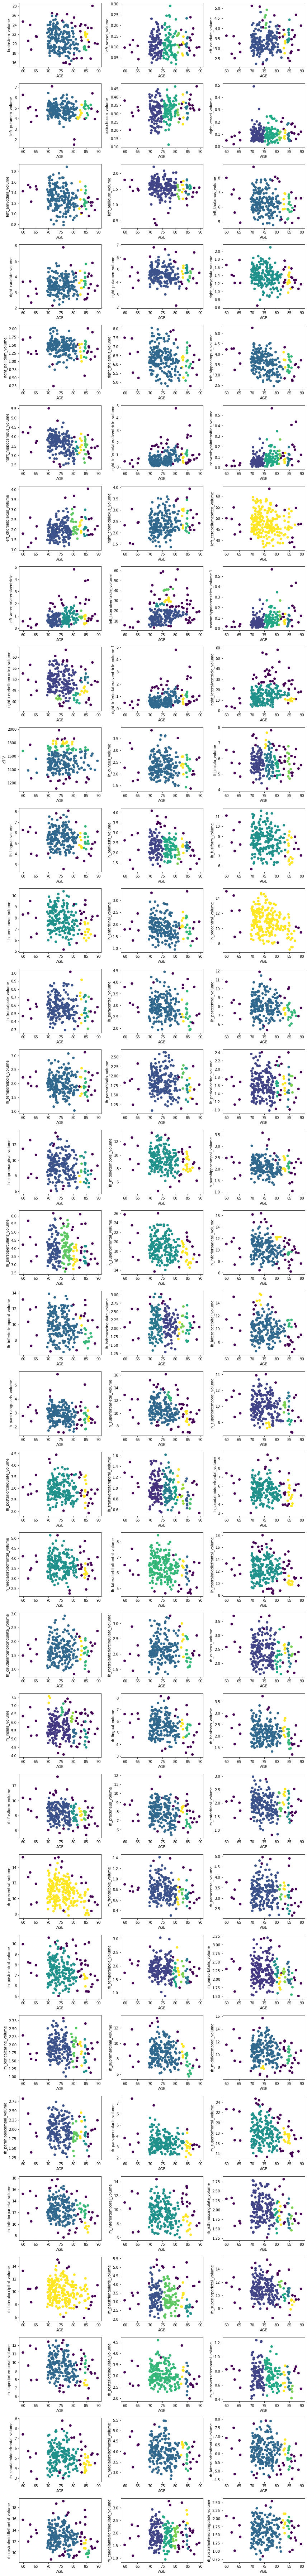

Unnamed: 0   RID PTGENDER   AGE  brainstem_volume  left_vessel_volume  \
0             0     2     Male  74.3            23.003               0.063   
1             3     5     Male  73.7            22.015               0.122   
2             6     8   Female  84.5            19.434               0.102   
3             8    14   Female  78.5            15.665               0.027   
4             9    15     Male  80.8            23.706               0.151   
..          ...   ...      ...   ...               ...                 ...   
224         735  1280   Female  70.7            20.573               0.027   
225         741  1286   Female  75.5            20.872               0.073   
226         742  1288     Male  59.9            24.679               0.097   
227         752  1301   Female  72.1            24.993               0.073   
228         754  1306   Female  74.5            17.734               0.119   

     left_caudate_volume  left_putamen_volume  opticchiasm_volume  \
0                  4.395                4.892               0.308   
1                  3.090                4.778               0.308   
2                  2.527                3.976               0.331   
3                  3.528                4.189               0.328   
4                  2.923                4.351               0.307   
..                   ...                  ...                 ...   
224                3.607                5.399               0.223   
225                4.653                5.373               0.375   
226                3.639                6.264               0.379   
227                3.000                4.965               0.211   
228                3.167                4.374               0.219   

     right_vessel_volume  ...  rh_posteriorcingulate_volume  \
0                  0.077  ...                         3.809   
1                  0.070  ...                         3.910   
2                  0.067  ...                         3.176   
3                  0.038  ...                         2.889   
4                  0.100  ...                         2.693   
..                   ...  ...                           ...   
224                0.041  ...                         2.998   
225                0.067  ...                         3.082   
226                0.049  ...                         3.155   
227                0.053  ...                         3.043   
228                0.101  ...                         2.575   

     rh_transversetemporal_volume  rh_caudalmiddlefrontal_volume  \
0                           0.553                          6.566   
1                           1.022                          5.626   
2                           0.568                          3.546   
3                           0.683                          4.457   
4                           0.512                          3.937   
..                            ...                            ...   
224                         0.793                          3.844   
225                         0.883                          6.041   
226                         0.823                          7.391   
227                         0.615                          5.034   
228                         0.630                          4.605   

     rh_medialorbitofrontal_volume  rh_lateralorbitofrontal_volume  \
0                            3.835                           6.795   
1                            5.180                           7.397   
2                            3.435                           6.036   
3                            3.034                           5.795   
4                            3.982                           5.292   
..                             ...                             ...   
224                          3.812                           5.897   
225                          4.744                           5.509   
226                          3.903 

In [51]:
df_adni_new = df_adni.dropna()
plotalot(df_adni_new,"AGE",df_adni_new.columns[4:100],32,3) 
df_adni_new

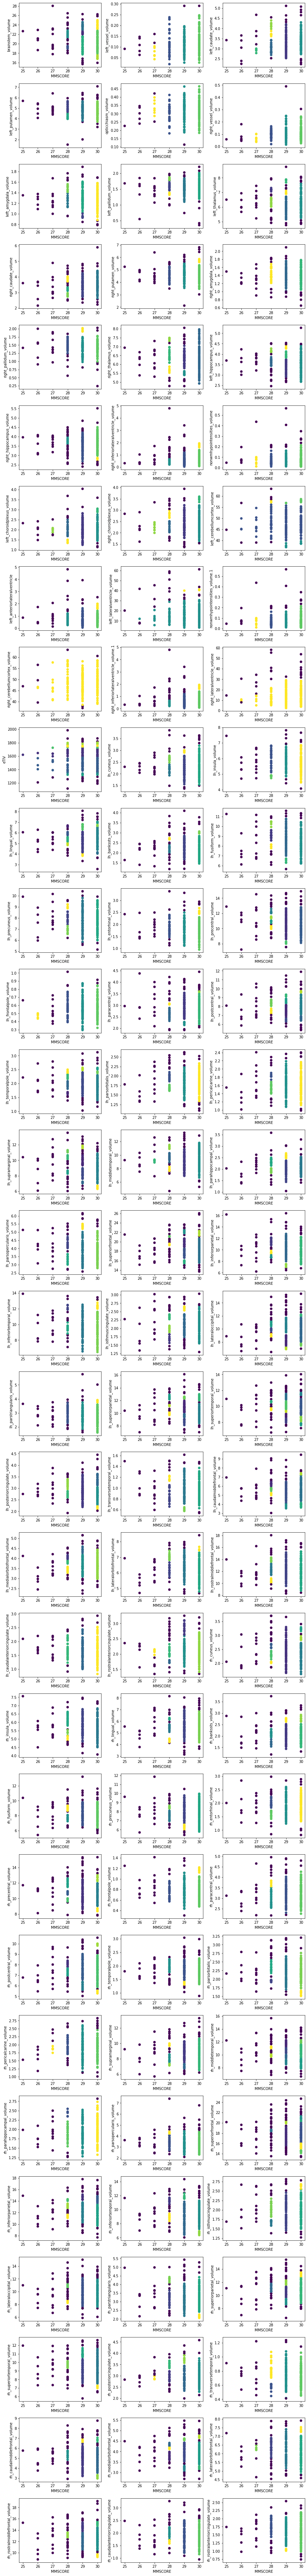

In [52]:
plotalot(df_adni_new,"MMSCORE",df_adni_new.columns[4:100],32,3) 

In [53]:
# Ejecutamos DBSCAN
#dbscan = DBSCAN(eps=0.1, metric = "euclidean").fit(new_df)
#clusters = dbscan.fit_predict(new_df)
#print(clusters)
#df_values = new_df.values
# Graficación de los clústers.
#plt.scatter(df_values[:, 1], df_values[:, 0], c=clusters)
#plt.xlabel("brain-stem")
#plt.ylabel("Edad")

In [54]:
def df_for_analysis(df,col_var,ran1,ran2):
  
    new_df_vol = df.iloc[:, ran1:ran2]
    
    list_df = []
        
    for c in col_var:
        new_df_vol_c = new_df_vol.copy()
        new_df_vol_c[c] = df[c].values
        list_df.append(new_df_vol_c)
        
    list_df_max = []
        
    for i in range(len(col_var)):
        resultado = list_df[i].groupby(col_var[i]).max()
        list_df_max.append(resultado)
        
    list_df_mean = []
        
    for i in range(len(col_var)):
        resultado = list_df[i].groupby(col_var[i]).mean()
        list_df_mean.append(resultado)
        
    list_df_min = []
        
    for i in range(len(col_var)):
        resultado = list_df[i].groupby(col_var[i]).min()
        list_df_min.append(resultado)
    
    return list_df_mean, list_df_max, list_df_min  
        

In [55]:
df_adni_new["AGE"] = df_adni_new["AGE"].apply(lambda x: round(x))
df_adni_new

C:\Users\andre\AppData\Local\Temp\ipykernel_16572\317243171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adni_new["AGE"] = df_adni_new["AGE"].apply(lambda x: round(x))


Unnamed: 0   RID PTGENDER  AGE  brainstem_volume  left_vessel_volume  \
0             0     2     Male   74            23.003               0.063   
1             3     5     Male   74            22.015               0.122   
2             6     8   Female   84            19.434               0.102   
3             8    14   Female   78            15.665               0.027   
4             9    15     Male   81            23.706               0.151   
..          ...   ...      ...  ...               ...                 ...   
224         735  1280   Female   71            20.573               0.027   
225         741  1286   Female   76            20.872               0.073   
226         742  1288     Male   60            24.679               0.097   
227         752  1301   Female   72            24.993               0.073   
228         754  1306   Female   74            17.734               0.119   

     left_caudate_volume  left_putamen_volume  opticchiasm_volume  \
0                  4.395                4.892               0.308   
1                  3.090                4.778               0.308   
2                  2.527                3.976               0.331   
3                  3.528                4.189               0.328   
4                  2.923                4.351               0.307   
..                   ...                  ...                 ...   
224                3.607                5.399               0.223   
225                4.653                5.373               0.375   
226                3.639                6.264               0.379   
227                3.000                4.965               0.211   
228                3.167                4.374               0.219   

     right_vessel_volume  ...  rh_posteriorcingulate_volume  \
0                  0.077  ...                         3.809   
1                  0.070  ...                         3.910   
2                  0.067  ...                         3.176   
3                  0.038  ...                         2.889   
4                  0.100  ...                         2.693   
..                   ...  ...                           ...   
224                0.041  ...                         2.998   
225                0.067  ...                         3.082   
226                0.049  ...                         3.155   
227                0.053  ...                         3.043   
228                0.101  ...                         2.575   

     rh_transversetemporal_volume  rh_caudalmiddlefrontal_volume  \
0                           0.553                          6.566   
1                           1.022                          5.626   
2                           0.568                          3.546   
3                           0.683                          4.457   
4                           0.512                          3.937   
..                            ...                            ...   
224                         0.793                          3.844   
225                         0.883                          6.041   
226                         0.823                          7.391   
227                         0.615                          5.034   
228                         0.630                          4.605   

     rh_medialorbitofrontal_volume  rh_lateralorbitofrontal_volume  \
0                            3.835                           6.795   
1                            5.180                           7.397   
2                            3.435                           6.036   
3                            3.034                           5.795   
4                            3.982                           5.292   
..                             ...                             ...   
224                          3.812                           5.897   
225                          4.744                           5.509   
226                          3.903             

In [56]:
from tabulate import tabulate

# Cagas pa ADNI
col_var = ['AGE', 'PTEDUCAT', 'MMSCORE']
ran1 = 4
ran2 = 98
d1_adni, d2_adni, d3_adni = df_for_analysis(df_adni_new,col_var,ran1,ran2)

print("================================= PROMEDIO =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d1[i], headers='keys', tablefmt='psql'))

print("================================= MAXIMOS =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d2[i], headers='keys', tablefmt='psql'))
    
print("================================= MINIMOS =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d3[i], headers='keys', tablefmt='psql'))

================================= PROMEDIO =================================
AGE:
+-------+--------------------+----------------------+-----------------------+-----------------------+----------------------+-----------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-------------------------+-------------------------+-------------------------+---------------------------+----------------------------+-----------------------------------------+-------------------------------+-----------------------------+------------------------------+--------------------------------+---------------------------------+--------------------------------+---------------------------------+---------------------------------+-------------------------------------------+---------------------------------+---------+--------------------+--------------------+---------------------+----------------------+----------------------+---------

AGE
60    24.846532
62    20.950053
63    22.498383
65    21.609660
70    22.668052
71    22.217270
72    22.788759
73    22.955784
74    22.523207
75    22.946404
76    23.555607
77    23.181287
78    22.175161
79    22.403949
80    23.115493
81    22.289089
82    20.614266
83    23.438349
84    20.954592
85    23.362416
86    20.859028
87    21.825777
88    23.821479
89    20.542149
90    22.359000
dtype: float64


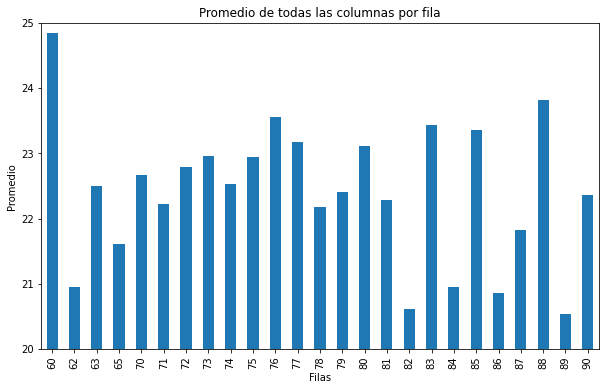

In [57]:
# Calcular el promedio de cada fila
row_means = d1_adni[0].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de todas las columnas por fila')
plt.xlabel('Filas')
plt.ylabel('Promedio')


plt.ylim(20, 25)
# Mostrar el gráfico
plt.show()

PTEDUCAT
6     19.275670
7     20.604303
8     21.418064
9     19.936628
10    21.081977
12    22.485099
13    21.639174
14    22.033694
15    22.085303
16    23.164551
17    21.953253
18    23.021052
19    23.050584
20    23.555714
dtype: float64


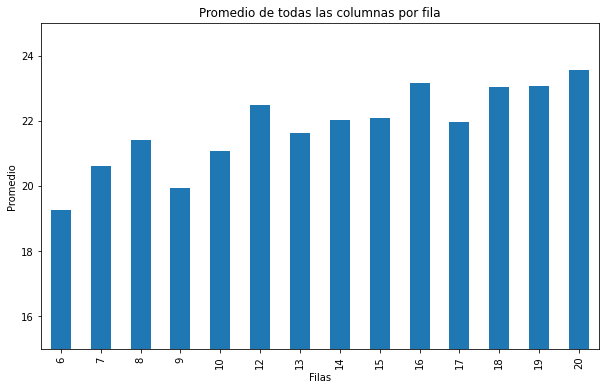

In [58]:
# Calcular el promedio de cada fila
row_means = d1_adni[1].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de todas las columnas por fila')
plt.xlabel('Filas')
plt.ylabel('Promedio')


plt.ylim(15, 25)
# Mostrar el gráfico
plt.show()

MMSCORE
25    24.116702
26    21.368960
27    22.683216
28    23.191997
29    22.655015
30    22.555541
dtype: float64


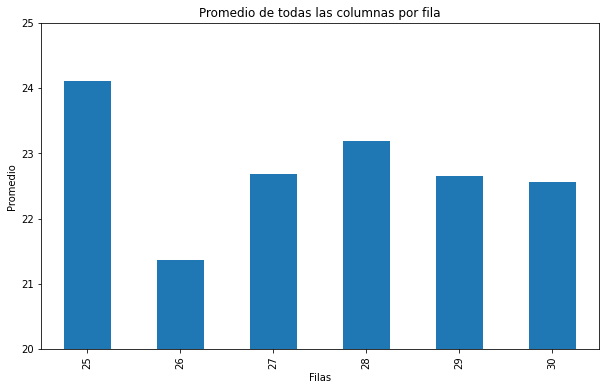

In [59]:
# Calcular el promedio de cada fila
row_means = d1_adni[2].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de todas las columnas por fila')
plt.xlabel('Filas')
plt.ylabel('Promedio')


plt.ylim(20, 25)
# Mostrar el gráfico
plt.show()

In [60]:
# Cagas pa INCA
col_var = ['Escolaridad']
ran1 = 4
ran2 = 98
d1_inca_esc, d2_inca_esc, d3_inca_esc = df_for_analysis(df_inca_esco,col_var,ran1,ran2)

print("================================= PROMEDIO =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d1[i], headers='keys', tablefmt='psql'))

print("================================= MAXIMOS =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d2[i], headers='keys', tablefmt='psql'))
    
print("================================= MINIMOS =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d3[i], headers='keys', tablefmt='psql'))

================================= PROMEDIO =================================
Escolaridad:
+-------+--------------------+----------------------+-----------------------+-----------------------+----------------------+-----------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-------------------------+-------------------------+-------------------------+---------------------------+----------------------------+-----------------------------------------+-------------------------------+-----------------------------+------------------------------+--------------------------------+---------------------------------+--------------------------------+---------------------------------+---------------------------------+-------------------------------------------+---------------------------------+---------+--------------------+--------------------+---------------------+----------------------+----------------------+-

Escolaridad
3     21.807253
6     24.081677
8     19.603494
10    21.256452
11    19.438651
12    19.618212
13    23.975308
15    21.289179
16    24.937867
17    20.651059
22    22.803798
23    27.894484
dtype: float64


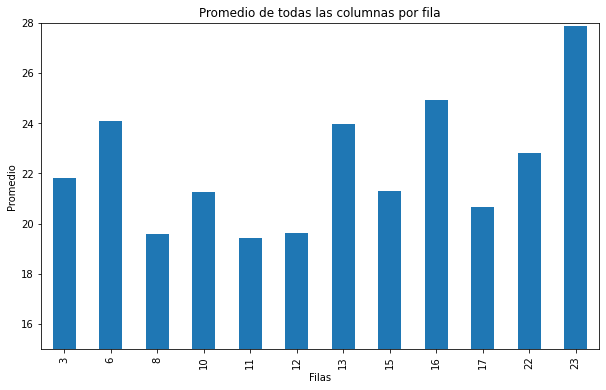

In [61]:
# Calcular el promedio de cada fila
row_means = d1_inca_esc[0].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de todas las columnas por fila')
plt.xlabel('Filas')
plt.ylabel('Promedio')


plt.ylim(15, 28)
# Mostrar el gráfico
plt.show()

In [62]:
# Cagas pa INCA
col_var = ['MiniMental_Total_Score']
ran1 = 4
ran2 = 98
d1_inca_mm, d2_inca_mm, d3_inca_mm = df_for_analysis(df_inca_psico,col_var,ran1,ran2)

print("================================= PROMEDIO =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d1[i], headers='keys', tablefmt='psql'))

print("================================= MAXIMOS =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d2[i], headers='keys', tablefmt='psql'))
    
print("================================= MINIMOS =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d3[i], headers='keys', tablefmt='psql'))

================================= PROMEDIO =================================
MiniMental_Total_Score:
+-------+--------------------+----------------------+-----------------------+-----------------------+----------------------+-----------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-------------------------+-------------------------+-------------------------+---------------------------+----------------------------+-----------------------------------------+-------------------------------+-----------------------------+------------------------------+--------------------------------+---------------------------------+--------------------------------+---------------------------------+---------------------------------+-------------------------------------------+---------------------------------+---------+--------------------+--------------------+---------------------+----------------------+-------------

MiniMental_Total_Score
26.0    23.975308
27.0    21.807253
28.0    19.940917
29.0    20.472800
30.0    20.217458
dtype: float64


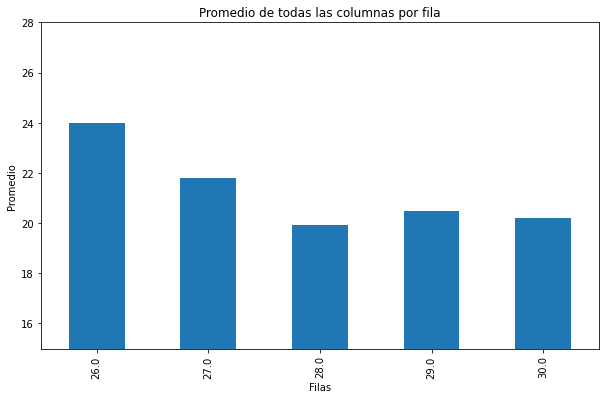

In [63]:
# Calcular el promedio de cada fila
row_means = d1_inca_mm[0].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de todas las columnas por fila')
plt.xlabel('Filas')
plt.ylabel('Promedio')


plt.ylim(15, 28)
# Mostrar el gráfico
plt.show()

In [64]:
df_inca_gm_volumen = pd.read_csv("./df_inca_gm_volumen.csv",sep=';')
df_inca_gm_volumen["age"] = df_inca_gm_volumen["age"].apply(lambda x: round(x))
df_inca_gm_volumen


Unnamed: 0 participant_id gender  age  brain-stem  left-vessel  \
0            0        sub-214      f   74     17.4850       0.0175   
1            1        sub-161      f   78     16.8912       0.0032   
2            2        sub-172      f   77     15.7690       0.0064   
3            3        sub-138      m   74     22.1628       0.0239   
4            4        sub-139      m   76     17.3174       0.0042   
5            5        sub-142      f   72     16.3012       0.0176   
6            6        sub-192      f   91     17.7342       0.0600   
7            7        sub-196      f   77     20.4006       0.0139   
8            8        sub-198      f   75     19.7109       0.0261   
9            9        sub-201      f   74     19.5976       0.1781   
10          10        sub-202      f   78     15.9974       0.0936   
11          11         sub-35      m   74     21.3132       0.0459   
12          12         sub-38      m   80     21.3375       0.0366   
13          13         sub-40      f   70     23.7640       0.0281   
14          14         sub-41      f   80     18.9305       0.0271   
15          15         sub-61      f   81     20.2091       0.0553   
16          16        sub-237      f   73     16.8357       0.0385   
17          17        sub-238      m   72     21.3815       0.0190   
18          18        sub-241      f   76     24.4480       0.0757   
19          19        sub-242      m   80     23.0100       0.0365   
20          20        sub-243      f   74     18.9961       0.0315   
21          21         sub-71      f   73     20.1453       0.0794   
22          22         sub-78      m   76     20.5727       0.1034   
23          23        sub-513      f   61     18.8306       0.0271   
24          24        sub-514      f   77     19.0509       0.0146   
25          25        sub-515      f   69     23.4582       0.0124   
26          26        sub-516      f   67     19.9067       0.0360   
27          27        sub-517      f   61     18.1277       0.0463   
28          28        sub-518      m   81     22.0295       0.0429   
29          29        sub-519      f   66     20.1154       0.0449   
30          30        sub-520      f   55     27.0367       0.0195   

    left-caudate  left-putamen  optic-chiasm  right-vessel  ...  \
0         3.4699        4.4771        0.1348        0.0041  ...   
1         3.3686        4.8374        0.1614        0.0000  ...   
2         2.7845        3.6798        0.1129        0.0133  ...   
3         3.0680        4.7896        0.2166        0.0161  ...   
4         2.9996        3.7887        0.1696        0.0161  ...   
5         2.8895        3.8551        0.0904        0.0070  ...   
6         2.6106        4.0005        0.2235        0.0116  ...   
7         2.9633        4.4863        0.1896        0.0386  ...   
8         2.5264        4.0270        0.1505        0.0162  ...   
9         3.5735        4.5291        0.2393        0.0109  ...   
10        2.9457        4.4270        0.2525        0.0246  ...   
11        3.9581        4.5473        0.2829        0.0210  ...   
12        3.3072        5.0225        0.2177        0.0120  ...   
13        3.7134        5.2970        0.1918        0.1752  ...   
14        2.7593        3.4234        0.2021        0.0121  ...   
15        3.6450        4.9514        0.2243        0.0146  ...   
16        2.3952        4.1465        0.1095        0.0578  ...   
17        3.0378        4.3382        0.1860        0.0045  ...   
18        3.2472        4.1231        0.2388        0.0144  ...   
19        3.0602        3.7570        0.1697        0.0559  ...   
20        2.6957        3.9301        0.1662        0.0213  ...   
21        2.7335        4.4021        0.1711        0.0000  ...   
22        3.3720        4.0565        0.2407        0.0098  ...   
23        2.9552        3.7571        0.1330        0.0579  ...   
24        4.3852        5.0558        0.2458        0.0401  ...   
25        3.0872     

In [65]:
# Cagas pa INCA
col_var = ['age']
ran1 = 4
ran2 = 98
d1_inca_age, d2_inca_age, d3_inca_age = df_for_analysis(df_inca_gm_volumen,col_var,ran1,ran2)

print("================================= PROMEDIO =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d1[i], headers='keys', tablefmt='psql'))

print("================================= MAXIMOS =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d2[i], headers='keys', tablefmt='psql'))
    
print("================================= MINIMOS =================================")
for i in range(len(col_var)):
    print(col_var[i]+":")
    print(tabulate(d3[i], headers='keys', tablefmt='psql'))

================================= PROMEDIO =================================
age:
+-------+--------------------+----------------------+-----------------------+-----------------------+----------------------+-----------------------+------------------------+------------------------+------------------------+------------------------+------------------------+-------------------------+-------------------------+-------------------------+---------------------------+----------------------------+-----------------------------------------+-------------------------------+-----------------------------+------------------------------+--------------------------------+---------------------------------+--------------------------------+---------------------------------+---------------------------------+-------------------------------------------+---------------------------------+---------+--------------------+--------------------+---------------------+----------------------+----------------------+---------

age
55    20.691771
61    20.184831
66    18.316888
67    19.775797
69    21.109933
70    24.937867
72    21.007898
73    18.120492
74    22.385524
75    19.752945
76    23.072518
77    20.922287
78    19.661083
80    20.987075
81    24.194229
91    19.899704
dtype: float64


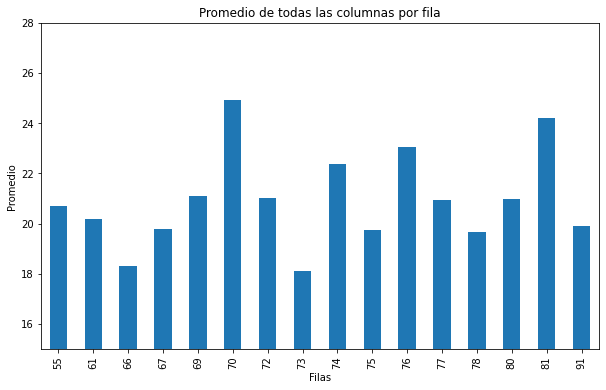

In [66]:
# Calcular el promedio de cada fila
row_means = d1_inca_age[0].mean(axis=1)

print(row_means)

# Graficar el promedio de cada fila
row_means.plot(kind='bar', figsize=(10, 6))

# Configurar el título y las etiquetas de los ejes
plt.title('Promedio de todas las columnas por fila')
plt.xlabel('Filas')
plt.ylabel('Promedio')


plt.ylim(15, 28)
# Mostrar el gráfico
plt.show()